# AUTOENCODERS

**AutoEncoders**


**Autoencoders nedir?**
Autoencdoers unsupervised algoritmasıdır. Öğrenilecek labellar yoktur. 

Autoencoders’da amaç nedir?

**1.Dimension Reduction (Boyut Azaltma)- 2.Feature Extraction - ve 3.Denoising**

Dimesion Reduction: Bir feature içindeki en önemli feature’leri seçiyor. En önemli derken biim belirlediğimiz ölçüde. Özetle en az şekilde bilgi kaydetmektir.

Autoencoder da amaçlardan biri de girdi olarak girilen bir resmin aynısının output olarak elde edilmesinin çalışışması. Kopyalarken amaç girilen input hakkında feature toplamak ve bunların extract edilmesidir. Eğer ki inputla aynı outpu elde edebilrsem bilebilirim ki iyi feature’lar elde edebilmişimdir. İnput ve output arasındaki kod kısmına bottleneck ya da latent space presantation olarak da adlandırabiliriz. Bu kısımlar input’dan öğrendiğim kısımlardır. Amacım burda “Feature extraction” yapabilmektir.


Şimdi elimizde bir input image olduğunu varsayalım ve bu input’u bir bir encoder’a sokalım. Encoder’in görevi; compress input yapar. “Compress Input” ne demek? Compress Input elimde var olan inputu ifade edebilecek “en iyi ” featureleri ortaya çıkarmaktır. Bunu nasıl yapıyor girişte aktivasyon fonksiyonları ve farklı farklı hidden layer’lar sayesinde yapabiliyor. Encoder’ ı F diye tanımlayalım x input image ve sonuç h olsun.

H= f(X)   -->  Encoding Function

Ardından h ile “decoding” işlemi yapalım. Burada fonksiyonumuzun adı g olsun.

R =g(h) --> Decoding Function

Bizim asıl sorumuz şu olacaktır Encoding fonksiyonuna giren x ile Decoding fonksiyonundan çıkan r değerimiz aynı mı? Bunun için de MSE(Minimize Square Error) fonksiyonundan yardım alıyoruz.
x-r ?=0
(x-r)^2 ?=0 
Tüm loss değerlerinin toplamı sıfır olmalıdır. 

Eğer ki x ve r değerlerinden elde edilen loss değeri sıfır değilse (x!=r) BACKPROPAGATION işlemi yapılacaktır. Weight’leri güncellemektir. Modelimiz train edecek ve x ile r’ı birbirine eşitlemeye çalışıyor.   Sonuç olarak faydalı feature’ları öğrenmiş olacaktır. 

 Trick: input size >hidden size olmalıdır. 


**Denoising**:

Deniosing verileri gürültüden temizlemektir. Şimdi bir input image düşünelim. Bu resme ilk başta biraz gürültü(noise) ekliyoruz. Ardından yeni bir resim elde ediyorum. Corrupted image elde ediyoruz. İnput olarak autoencoder’a sokuyoruz. Daha sonra çıkan sonuçlar orijinal image’e veriyorum. Böylece noise ‘u öğrenmiş oluyorum ve Corrupted bir image ile karşılaştığımda bunu “Denoising” yapmış oluyoruz. Bunu gerçek hayat image’lerinde bize kolaylık sağlıyor. 


Fashion Mnist DataSet Tanımı:
    
keras'ın içinde tanımlı kıyafet image'lerden oluşan bir datasettir.

In [4]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")


Veriyi yükleyeceğiz fakat başta belirttik bizim verisetimiz etiketsiz bu sebeple elimizde yalnızca x_test, x_train olacak.

In [5]:
(x_train, _),(x_test, _)= fashion_mnist.load_data()

Şimdi hem resimleri float'a çevirip ardından normalize edeceğiz. 

In [6]:
x_train= x_train.astype("float32")/255.0
x_test= x_test.astype("float32")/255.0

In [7]:
x_train.shape

(60000, 28, 28)

Bizim bu shape'i 60000, 784 haline getireceğiz.

In [8]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

Bir image görüntüsüne bakalım.

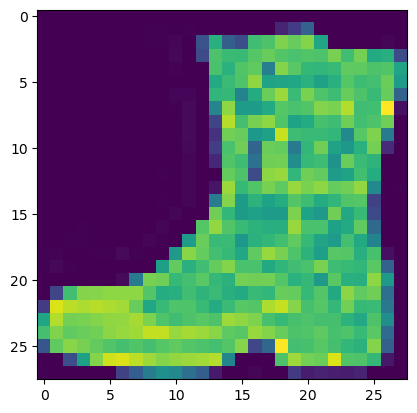

In [9]:
plt.imshow(x_train[150].reshape(28,28))

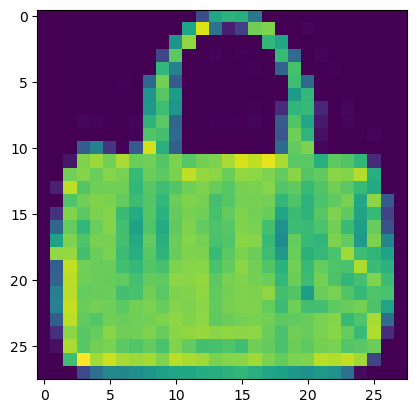

In [10]:
plt.imshow(x_train[4000].reshape(28,28))

#### Autoencoder 

resimler 28x28 den (784,1) halnine getirilip input olacak ardından bir input layer ardında 3 tane hidden layer ardından bir output layer elde edeceğiz.

In [ ]:
input_img= Input(shape=(784,))

encoded= Dense(12, activation="relu")(input_img)
encoded= Dense(6, activation="relu")(encoded)
decoded= Dense(6, activation= "relu")(encoded)
decoded= Dense(784, activation= "softmax")(decoded)

autoencoder= Model(input_img, decoded)

autoencoder.compile(optimizer= "rmsprop",
                   loss= "binary_crossentropy")

hist=autoencoder.fit(x_train, x_train,
                    epochs=4,
                    batch_size= 256,
                    shuffle=False,
                    validation_data= (x_train,x_train))

In [ ]:
#evaluation
print(hist.history.keys())

In [ ]:
plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")
plt.legend()
plt.show()

In [ ]:
# save history (hist)
with open("autoencoders_hist.json","w") as f:
    json.dump(hist.history,f)

In [ ]:
# load history
with codecs.open("autoencoders_hist.json","r", encoding="utf-8")  as f:
    n = json.loads(f.read())

In [ ]:
print(n.keys())
plt.plot(n["loss"],label = "Train loss")
plt.plot(n["val_loss"],label = "Val loss")

In [ ]:
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(x_test)